# The results of `varbvs` result and `logitBvs` 

## Previous simulation
1. Simulation report [link](https://gaow.github.io/cnv-gene-mapping/dsc/20190819_workflow_report.html)
2. Simulation sample size: 13412
3. Number of natural gene blocks of real deletion CNV data: 528
4. Number of natural gene blocks for simulated CVN data: 527

### The histogram for the number of genes in simulated natural gene blocks

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.genes.block1.histogram.pdf (11.8 KiB):

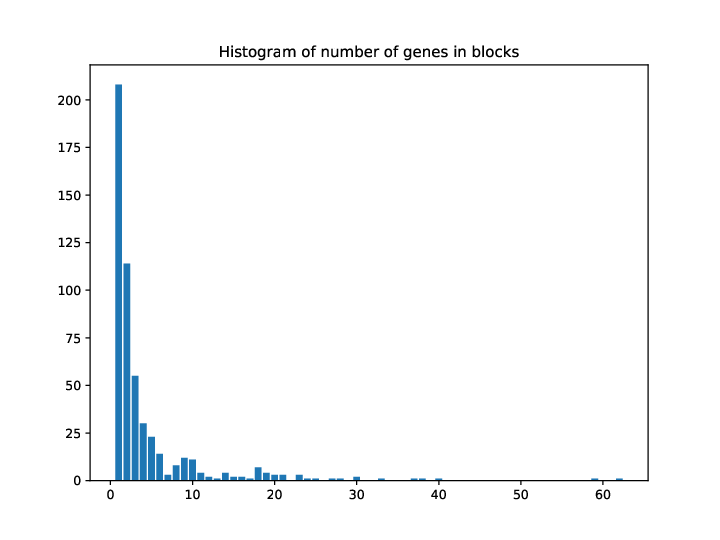

In [1]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.genes.block1.histogram.pdf -s png --dpi 90

## `varbvs` results comparison with real `beta`

Simulated $\beta$'s (22356)
1. $\mu$: 1
2. sd: 0.5
3. $\pi$: 0.05

`varbvs`: "Averaged" posterior mean regression coefficients
1. $\mu$: 0.777
2. sd: 0.84365
3. $\pi$: 0.043775

## `logitBvs` result
`logitBvs` [link](https://rdrr.io/cran/pogit/man/logitBvs.html): Bayesian variable selection for the binomial logit model. We use `logitBvs` to perform MCMC sampling.

1. `logitBvs` function and arguments
```
mu0 = 0.777; var = 0.84365^2  ## (varbvs result)
## To fit pi (0.0437): set beta distribution alpha = 1.412, beta = 10, highest density around 0.043
res = logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = rep(mu0, ncol(X)-1), V = var, w = c(pa0 = 1.412, pb0 = 10), pi = c(wa0 = 1, wb0 = 1)), 
               mcmc = list(M = 10000, burnin = 2000, msave = TRUE), BVS = FALSE)
```
2. PIP: only when `aj0` is set to default 0, PIPs are being calculated.
    
    **If prior information on the regression parameters is available (I guess it means that`aj0` not 0), this information is encoded in a normal distribution instead of the spike and slab prior (BVS is set to FALSE).** R package `pogit` [manual link](https://cran.r-project.org/web/packages/pogit/pogit.pdf). The description is on page 7. I doubt I did not use it correctly.
    
    When `aj0` != 0, PIPs are calculated and exported as a matrix of all 1's, the dimension is the number of MCMC iteration by the number of $\beta$'s.
    
    When `aj0` =0, PIP are calculated and exported as a matrix of numbers between 0 and 1.
    
3. Arguments $\omega$ and $\pi$: The results for setting either of them not as default does not make much difference.

Two natural blocks were selected for MCMC. For each block, compute Pearson correlation $X*\hat{\beta}$ and $X*\beta_{simu}$
1. `block_1215_1273`: correlation $0.3251993$
2. `block_164_177`: correlation $0.9919708$

## `BoomSpikeSlab` results

### Use function `LogitZellnerPrior` to obtain prior
```
prior <- LogitZellnerPrior(X(with intercept), y, N, prior.success.probability = NULL, expected.model.size = 1, prior.information.weight = 0.05, 
                           diagonal.shrinkage = 0, optional.coefficient.estimate = NULL, prior.inclusion.probabilities = NULL)
```
X should be with intercept (all 1's).

prior$mu, `prior$mu` will be all 0 except intercept.
```
-2.81430583840715
0
0
0
0
...
```

prior$prior.inclusion.probabilities, same for all variables include intercept

```
0.0333333333333333
0.0333333333333333
0.0333333333333333
0.0333333333333333
0.0333333333333333
...
```

prior$sigma.guess

```
0.707106781186548
```

### Use function `logit.spike` for MCMC, 1000 iteration

```
logit.spike(y ~ X, niter = 1000, prior = prior)
```

No intercept for X input. The result depends much on the prior $\mu$ provided. The results are not stable even with the same parameter. May because iteration not enough???

`prior.inclusion.probabilities` and `sigma` could be replaced without generating an error.
1. No `prior` provided (If prior is supplied it will be used. Otherwise a prior distribution will constructed by calling `LogitZellnerPrior`.)

```
null log likelihood:            -1545.166 
posterior mean log likelihood:  -1545.639 
posterior max log likelihood:   -1545.166 
mean deviance R-sq:             -0.0003057917 

predicted vs observed success rates, by decile:
                   predicted   observed
(0.05666,0.05667] 0.05667028 0.05647325

summary of coefficients:
                mean      sd mean.inc sd.inc inc.prob
(Intercept) -2.81000 0.05000    -2.81   0.05    1.000
XV31        -0.00017 0.00539    -0.17   0.00    0.001
XV59         0.00000 0.00000     0.00   0.00    0.000
XV58         0.00000 0.00000     0.00   0.00    0.000
XV57         0.00000 0.00000     0.00   0.00    0.000
```

2. Use prior from `LogitZellnerPrior`

```
null log likelihood:            -1545.166 
posterior mean log likelihood:  -1545.705 
posterior max log likelihood:   -1545.166 
mean deviance R-sq:             -0.0003486287 

predicted vs observed success rates, by decile:
                 predicted   observed
(0.0566,0.0567] 0.05666383 0.04347826

summary of coefficients:
                 mean     sd mean.inc sd.inc inc.prob
(Intercept) -2.810000 0.0534   -2.810 0.0534    1.000
XV23         0.000387 0.0122    0.387 0.0000    0.001
XV59         0.000000 0.0000    0.000 0.0000    0.000
XV58         0.000000 0.0000    0.000 0.0000    0.000
```
3. If replace all predictor variables in `prior$mu` with the same positive number (e.g. mu from `varbvs`), `logit.spike` would generate error. 

```
Error in logit.spike(y ~ X, niter = 1000, prior = prior1): Caught exception with the following error message: 
BinomialLogitSpikeSlabSampler did not start with a legal configuration.
Selector vector:  111111111111111111111111111111111111111111111111111111111111
beta: -2.80456 -0.0448699 -105.725 -11.8131 -152.214 169.162 -61.8338 -60.5791 -93.9208 127.14 -121.228 21.1879 -97.2869 141.847 -0.0821741 -0.463076 -0.655192 -0.0626618 0.391438 -0.110333 -0.175838 0.341724 -0.343848 0.16436 -0.181421 0.118219 -0.247901 0.469834 0.639211 -0.00259735 0.0308668 -0.170393 0.533547 0.11682 -0.269742 0.11209 -0.355633 -0.162975 0.0557523 -0.152552 0.329034 0.102837 0.0438444 0.328603 0.0805891 -0.365102 -1.25351 -0.579535 1.57087 0.240165 0.161255 0.0372671 -0.0992332 -0.40193 -0.888907 -0.121898 0.80505 -0.29422 1.26817 0.71773
```
4. If replace a few of them (replacement cannot be greater than 2 consecutively) with mu0, , there would be either error or no error. So predictors cannot be replaced with all non-zero.

```
null log likelihood:            -1545.166 
posterior mean log likelihood:  -1545.637 
posterior max log likelihood:   -1544.987 
mean deviance R-sq:             -0.0003043409 

predicted vs observed success rates, by decile:
                 predicted   observed
(0.0564,0.0582] 0.05739954 0.05128205

summary of coefficients:
                 mean     sd mean.inc  sd.inc inc.prob
(Intercept) -2.820000 0.0478  -2.8200 0.04780    1.000
XV22         0.000816 0.1230   0.0742 1.23000    0.011
XV55         0.002830 0.0449   0.7070 0.08550    0.004
XV44         0.001430 0.0243   0.3580 0.16100    0.004
XV33         0.003210 0.0506   0.8010 0.00488    0.004
XV23         0.003010 0.0477   0.7540 0.04700    0.004
XV11         0.004150 0.0664   1.0400 0.20300    0.004
XV5         -0.000840 0.0266  -0.8400 0.00000    0.001
XV59         0.000000 0.0000   0.0000 0.00000    0.000
XV58         0.000000 0.0000   0.0000 0.00000    0.000
```

5. Interation 30000 with `LogitZellnerPrior` prior
```

```